# Prepare configuration for the pipeline and Google authorization, import libraries

In [1]:
import os
import sys
from google.colab import auth
import yaml
# Mount your Google Drive to access persistent files
from google.colab import drive
drive.mount('/content/drive')

# Authenticate user
auth.authenticate_user()

# Create project direction
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"
os.makedirs(project_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(project_dir)

# Build .yaml-file
# Define the configuration data (this can be modified as per your need)
# Documentation for Open-Meteo requests
# https://pypi.org/project/openmeteo-requests/

config_data = {
    "project": {
        "project_id": "elt-siegburg-weather-forecast",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_november_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        "dataset_prediction": "elt_weather_dataset_prediction_siegburg_november_2025",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
    "api_current": {
        "elt_weather_table_current": "https://api.open-meteo.com/v1/forecast?latitude=50.79086&longitude=7.2064056&current=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
      "api_historical":{
         "elt_weather_table_historical_siegburg_2017": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2017-01-01&end_date=2017-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2018": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2018-01-01&end_date=2018-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2019": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2019-01-01&end_date=2019-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2020": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2020-01-01&end_date=2020-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2021": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2021-01-01&end_date=2021-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2022": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2022-01-01&end_date=2022-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2023": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2024": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Placeholders for open-meteo python packages
    "params_current": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "current": ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                    "precipitation", "surface_pressure"],
        "timezone": "Europe/Berlin"
    },
    # Placeholders for open-meteo python packages
    "params_historical": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "wind_speed_10m", "wind_direction_10m"],
        "timezone": "Europe/Berlin",
    }
}

# Writes this configuration to a YAML file in Colab
config_file_path = '/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml'
with open(config_file_path, 'w') as file:
    yaml.dump(config_data, file, default_flow_style=False)

# Confirm the file has been created
print(f"config.yaml has been written to {config_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
config.yaml has been written to /content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml


# GCP Ressource Management (gcp_utils/ or gcloud_admin/)

In [2]:
import os
import sys
from google.colab import auth
import datetime

# Create gcp utilization direction
gcp_utils_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils"
os.makedirs(gcp_utils_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(gcp_utils_dir)

# Generate .py files
# Load the YAML configuration file
load_config = """
import yaml

def load_config(config_file):
    with open(config_file, 'r') as file:
        return yaml.safe_load(file)
"""
# Save to file
with open(f"{project_dir}/load_config.py", "w") as f:
    f.write(load_config)


# create_dataset.py - generate and save inside /contentdrive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
# Creates datasets in Google Cloud
extract_code = """
from google.cloud import bigquery

def create_dataset(project_id, dataset_id, location="EU"):
    # Creates a BigQuery dataset if it doesn't exist.
    client = bigquery.Client(project=project_id)
    dataset_ref = client.dataset(dataset_id)
    try:
        client.get_dataset(dataset_ref)
        print(f"Dataset '{dataset_id}' already exists.")
    except:
        dataset = bigquery.Dataset(dataset_ref)
        dataset.location = location
        client.create_dataset(dataset)
        print(f"Dataset '{dataset_id}' created.")
"""
# Save to file
with open(f"{gcp_utils_dir}/create_dataset.py", "w") as f:
    f.write(extract_code)


# create_table.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
# Creates tables inside datasets in Google Cloud
extract_code = """
from google.cloud import bigquery

def create_table(project_id, dataset_id, table_id):

    # Creates a BigQuery table if it doesn't exist.
    client = bigquery.Client(project=project_id)
    dataset_ref = client.dataset(dataset_id)
    table_ref = dataset_ref.table(table_id)
    try:
        client.get_table(table_ref)
        print(f"Table '{table_id}' already exists.")
    except:
        # table = bigquery.Table(table_ref, schema=schema)
        table = bigquery.Table(table_ref)
        client.create_table(table)
        print(f"Table '{table_id}' created.")
"""
# Save to file
with open(f"{gcp_utils_dir}/create_table.py", "w") as f:
    f.write(extract_code)


# gcp_utils/main.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from create_dataset import create_dataset
from create_table import create_table
from load_config import load_config

def main(project, dataset, table):

    # Load the config from the file we just created
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    # Create datasets and tables
    create_dataset(project, dataset)
    create_table(project, dataset, table)

if __name__ == "__main__":
    # You can provide default values here, or leave it empty
    main("project_id", "dataset", "table")
    """
# Save to file
with open(f"{gcp_utils_dir}/manage_gcp.py", "w") as f:
    f.write(extract_code)

# Pipeline Utils (weather_pipeline/)

In [3]:
# Generate .py files
# load_config.py generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast
# Load the YAML configuration file
load_config = """
import yaml

def load_config(config_file):
    with open(config_file, 'r') as file:
        return yaml.safe_load(file)
"""
# Save to file
with open(f"{project_dir}/load_config.py", "w") as f:
    f.write(load_config)

# fetch.py generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Fetches API weather data from https://open-meteo.com/ throgh URL
fetch_code = """
import requests
import pandas as pd
from load_config import load_config

def api_fetch(url, params=None):
    # Fetch API data with optional query parameters.
    response = requests.get(url, params=params)
    response.raise_for_status()
    return response.json()


def api_fetch_url(url, params=None):

    response = requests.get(url, params=params)
    response.raise_for_status()
    api_data = response.json()

    return api_data

def fetch_historical_weather():

    # Fetch historical weather data for all years defined in config.yaml.
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    historical_data_dict = {}  # store raw JSON responses per year
    historical_df_dict = {}    # store converted DataFrames per year

    # Loop through all URLs in config['api_historical']
    for key, url in config["api_historical"].items():
        year = key.split("_")[-1]  # extract year, e.g. "2017"
        print(f"Fetching weather data for {year}...")

        # Fetch from API
        data = api_fetch_url(url)
        historical_data_dict[year] = data

        # Convert the hourly data part to a DataFrame
        hourly_data = data.get("hourly")
        if hourly_data:
            df = pd.DataFrame(hourly_data)
            df["year"] = int(year)
            historical_df_dict[year] = df
            print(f"  → Loaded {len(df)} hourly records for {year}")

    return historical_data_dict, historical_df_dict
"""
# Save to file
with open(f"{project_dir}/fetch_utils.py", "w") as f:
    f.write(fetch_code)


# load.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Loads data to Google Cloud via BigQuery
extract_code = """
import time
import pandas as pd
import numpy as np
import datetime
from google.cloud import bigquery

def load_to_bigquery_raw(data, project_id, dataset, table):
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset}.{table}"

    try:
        # Check if table exists
        table_obj = client.get_table(table_ref)

        # Query row count
        row_count = table_obj.num_rows
        if row_count > 0:
            print(f"Table {table_ref} already has data ({row_count} rows). Skipping load.")
            return
        else:
            print(f"Table {table_ref} exists but is empty. Loading data...")
    except Exception as e:
        # Table doesn't exist
        print(f"Table {table_ref} does not exist. It will be created and data will be loaded.")

    # Load data
    job = client.load_table_from_dataframe(data, table_ref)
    job.result()
    print(f"Loaded {job.output_rows} rows to {table_ref}")

def load_to_bigquery(data, project_id, dataset, table):
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset}.{table}"

    try:
        # Check if table exists
        table_obj = client.get_table(table_ref)

        # Query row count
        row_count = table_obj.num_rows
        if row_count > 0:
            print(f"Table {table_ref} already has data ({row_count} rows). Skipping load.")
            return
        else:
            print(f"Table {table_ref} exists but is empty. Loading data...")
    except Exception as e:
        # Table doesn't exist
        print(f"Table {table_ref} does not exist. It will be created and data will be loaded.")

    # Load data
    job = client.load_table_from_dataframe(data, table_ref)
    job.result()
    print(f"Loaded {job.output_rows} rows to {table_ref}")

# Function to convert NumPy array to DataFrame
def numpy_to_dataframe(np_array):
    # If np_array is a single value (scalar), reshape it into a DataFrame
    if np_array.ndim == 1:  # For a 1D array
        return pd.DataFrame(np_array, columns=["prediction"])
    elif np_array.ndim == 2:  # For a 2D array
        return pd.DataFrame(np_array, columns=["prediction"])
    else:
        raise ValueError("Only 1D or 2D NumPy arrays are supported.")

# Function to fetch current month's number
def current_month():
    current_date = datetime.datetime.now()
    return current_date.month
"""
# Save to file
with open(f"{project_dir}/load_utils.py", "w") as f:
    f.write(extract_code)


# extract.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Extracts/loads data from Google Cloud via BigQuery
extract_code = """
import pandas as pd
from google.cloud import bigquery

def extract_weather_historical(project_id, dataset_historical, table_historical):
    '''Default full extract.'''
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset_historical}.{table_historical}"
    query = f"SELECT * FROM `{table_ref}`"
    df = client.query(query).to_dataframe()
    return df

def extract_weather_current(project_id, dataset_current, table_current):
    '''Default full extract.'''
    client = bigquery.Client(project=project_id)
    table_ref = f"{project_id}.{dataset_current}.{table_current}"
    query = f"SELECT * FROM `{table_ref}`"
    df = client.query(query).to_dataframe()
    return df

def extract_full_query(query, project_id):
    client = bigquery.Client(project=project_id)
    try:
        df = client.query(query).to_dataframe()
        print(f"Query executed successfully. Retrieved {len(df)} rows.")
        return df
    except Exception as e:
        print(f"Error executing query: {e}")
        return pd.DataFrame()

"""
# Save to file
with open(f"{project_dir}/query_utils.py", "w") as f:
    f.write(extract_code)


# transform.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Transforms data and renames columns
extract_code = """
import pandas as pd
from google.cloud import bigquery

def transform_data(df):
    df['date'] = pd.to_datetime(df['time']).dt.date
    df = df.rename(columns={
        "temperature_2m": "temp",
        "relative_humidity_2m": "rel_humidity",
        "surface_pressure": "pressure",
        "wind_speed_10m": "wind_speed",
        "wind_direction_10m": "wind_direction",
        "precipitation": "precip",
    })
    df = df.dropna(subset=['temp', 'rel_humidity', 'pressure',
                          'wind_speed', 'wind_direction', 'precip'])
    return df[['date', 'temp', 'rel_humidity', 'pressure',
                          'wind_speed', 'wind_direction', 'precip']]
"""
# Save to file
with open(f"{project_dir}/transform_utils.py", "w") as f:
    f.write(extract_code)


# predict.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Sets up simple Machine Learning predictions
extract_code = """
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def train_model(df_trans_historical):
    # Train a Random Forest model on historical weather data.
    # Returns trained model
    features = ['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']
    target = 'temp'

    df = df_trans_historical.sort_values("date")
    X_train = df[features]
    y_train = df[target]

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def predict_current(model, df_trans_current):
    # Use trained model to predict current temperature from a single or few records.
    # Returns prediction(s)
    features = ['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']

    # Make sure input is DataFrame with expected columns
    if isinstance(df_trans_current, pd.Series):
        df_trans_current = df_trans_current.to_frame().T

    prediction = model.predict(df_trans_current[features])
    return prediction
"""
# Save to file
with open(f"{project_dir}/predictor_utils.py", "w") as f:
    f.write(extract_code)


# visualize.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Visualization utils for ML/data
extract_code = """
import matplotlib.pyplot as plt

def visualize_current_prediction(df_trans_current, pred_temp):
    # Display current input features and predicted temperature.
    current = df_trans_current.iloc[0]  # Assuming 1 row
    print("Current weather input:")
    display(current.to_frame(name="value"))
    print(f"Predicted temperature: {pred_temp[0]:.2f} °C")

    # Plot weather features + predicted temp
    feature_values = current[['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']]
    feature_labels = ['Relative Humidity [%]', 'Precipitation [mm]', 'Surface Pressure [hPa]', 'Wind Speed [km/h]', 'Wind Direction [°]']

    plt.figure(figsize=(10, 5))
    bars = plt.bar(feature_labels, feature_values.values, color='skyblue')
    plt.title("Current Weather Features")
    plt.ylabel("Value")
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.figtext(0.99, 0.01, 'Weather data provided by Open-Meteo.com (CC BY 4.0)', ha='right', va='bottom', fontsize=8, color='gray')
    plt.show()

    # Show predicted temperature as a separate bar
    plt.figure(figsize=(4, 5))
    plt.bar(['Predicted Temp'], [pred_temp[0]], color='salmon')
    plt.ylim(0, max(50, pred_temp[0] + 5))  # Adjust Y-axis
    plt.title("Predicted Temperature")
    plt.ylabel("°C")
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

def plot_predictions_over_time(dates, actual, predicted):
    # Plot predicted vs actual temperature over time.
    plt.figure(figsize=(12,6))
    plt.plot(dates, actual, label='Actual Temperature', linewidth=2)
    plt.plot(dates, predicted, label='Predicted Temperature', linestyle='--')
    plt.title("Predicted vs Actual Temperature")
    plt.xlabel("Date")
    plt.ylabel("Temperature (°C)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.figtext(0.99, 0.01, 'Weather data provided by Open-Meteo.com (CC BY 4.0)', ha='right', va='bottom', fontsize=8, color='gray')
    plt.show()
"""
# Save to file
with open(f"{project_dir}/visualization_utils.py", "w") as f:
    f.write(extract_code)

# Prefect orchestrated ELT/ML Pipeline

In [4]:
# main.py — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
# Runs the Prefect Orchestration: Tasks → Flow → Run Flow
main_code = """
# prefect pipeline
import pandas as pd
import numpy as np
import datetime
from prefect import flow, task
from load_config import load_config
from load_utils import load_to_bigquery, load_to_bigquery_raw, numpy_to_dataframe
from fetch_utils import api_fetch_url, fetch_historical_weather
from transform_utils import transform_data
from predictor_utils import train_model, predict_current
from visualization_utils import plot_predictions_over_time, visualize_current_prediction
from query_utils import extract_full_query, extract_weather_current
from gcp_utils.create_dataset import create_dataset
from gcp_utils.create_table import create_table

# -------------
# Prefect Tasks
# -------------

@task
def load_config_task(config_path: str):
    return load_config(config_path)


@task(retries=3, retry_delay_seconds=10)
def create_dataset_task(project_id: str, dataset_id: str):
    return create_dataset(project_id, dataset_id)


@task(retries=3, retry_delay_seconds=10)
def create_table_task(project_id: str, dataset_id: str, table_id: str):
    return create_table(project_id, dataset_id, table_id)


@task(retries=3, retry_delay_seconds=10)
def fetch_historical_task(config: dict):
    historical_data_dict, historical_df_dict = fetch_historical_weather()
    return historical_data_dict, historical_df_dict


@task(retries=3, retry_delay_seconds=10)
def fetch_current_task(url_current: str):
    return api_fetch_url(url_current)


@task
def load_historical_to_bq_task(df_dict: dict, project_id: str, dataset_historical: str):
    for year, df in df_dict.items():
        if df.empty:
            continue
        table_name = f"elt_weather_table_historical_siegburg_{year}"
        load_to_bigquery_raw(df, project_id, dataset_historical, table_name)


@task
def load_current_to_bq_task(df_current: pd.DataFrame, project_id: str, dataset_month: str, table_current: str):
    load_to_bigquery_raw(df_current, project_id, dataset_month, table_current)


@task
def get_seasonal_historical_task(project_id: str, dataset_historical: str):
    current_time = datetime.datetime.now()
    target_month = current_time.month
    season_months = [(target_month - 1) % 12 or 12,
                     target_month,
                     (target_month + 1 - 1) % 12 + 1]

    df_historical_list = []

    for year in range(2017, 2025):
        table = f"elt_weather_table_historical_siegburg_{year}"
        query = f'''
        SELECT
          time,
          temperature_2m AS temp,
          relative_humidity_2m AS rel_humidity,
          surface_pressure AS pressure,
          wind_speed_10m AS wind_speed,
          wind_direction_10m AS wind_direction,
          precipitation AS precip,

          -- Lags
          LAG(temperature_2m, 1) OVER (ORDER BY time) AS lag_temp_1h,
          LAG(temperature_2m, 2) OVER (ORDER BY time) AS lag_temp_2h,
          LAG(temperature_2m, 3) OVER (ORDER BY time) AS lag_temp_3h,

          LAG(relative_humidity_2m, 1) OVER (ORDER BY time) AS lag_rel_humidity_1h,
          LAG(relative_humidity_2m, 2) OVER (ORDER BY time) AS lag_rel_humidity_2h,
          LAG(relative_humidity_2m, 3) OVER (ORDER BY time) AS lag_rel_humidity_3h,

          LAG(surface_pressure, 1) OVER (ORDER BY time) AS lag_pressure_1h,
          LAG(surface_pressure, 2) OVER (ORDER BY time) AS lag_pressure_2h,
          LAG(surface_pressure, 3) OVER (ORDER BY time) AS lag_pressure_3h,

          LAG(wind_speed_10m, 1) OVER (ORDER BY time) AS lag_wind_speed_1h,
          LAG(wind_speed_10m, 2) OVER (ORDER BY time) AS lag_wind_speed_2h,
          LAG(wind_speed_10m, 3) OVER (ORDER BY time) AS lag_wind_speed_3h,

          LAG(wind_direction_10m, 1) OVER (ORDER BY time) AS lag_wind_direction_1h,
          LAG(wind_direction_10m, 2) OVER (ORDER BY time) AS lag_wind_direction_2h,
          LAG(wind_direction_10m, 3) OVER (ORDER BY time) AS lag_wind_direction_3h,

          LAG(precipitation, 1) OVER (ORDER BY time) AS lag_precip_1h,
          LAG(precipitation, 2) OVER (ORDER BY time) AS lag_precip_2h,
          LAG(precipitation, 3) OVER (ORDER BY time) AS lag_precip_3h
        FROM `{project_id}.{dataset_historical}.{table}`
        '''

        df = extract_full_query(query, project_id)

        if not df.empty:
            df['time'] = pd.to_datetime(df['time'])
            df['month'] = df['time'].dt.month

            # Filter data to ±1 month around current time
            df = df[df['month'].isin(season_months)]

            # Add wind direction cyclical encoding
            df['wind_dir_sin'] = np.sin(np.deg2rad(df['wind_direction']))
            df['wind_dir_cos'] = np.cos(np.deg2rad(df['wind_direction']))

            # Add diurnal cyclical encodings
            df['hour'] = df['time'].dt.hour
            df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
            df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

            # Drop rows with missing lag values
            df.dropna(inplace=True)
            df_historical_list.append(df)
            print(f"Loaded {len(df)} rows from {table}")
        else:
            print(f"No data found for year {year}.")

    # Combine and summarize
    if df_historical_list:
        df_historical = pd.concat(df_historical_list, ignore_index=True)
        print(f"Total rows after seasonal concatenation: {len(df_historical)}")

        # Optional rolling/aggregate features
        df_historical['temp_mean_last3h'] = df_historical[['lag_temp_1h','lag_temp_2h','lag_temp_3h']].mean(axis=1)
        df_historical['wind_speed_mean_last3h'] = df_historical[['lag_wind_speed_1h','lag_wind_speed_2h','lag_wind_speed_3h']].mean(axis=1)
        df_historical['humidity_mean_last3h'] = df_historical[['lag_rel_humidity_1h','lag_rel_humidity_2h','lag_rel_humidity_3h']].mean(axis=1)

        print(df_historical.head())
        return df_historical
    else:
        print("No seasonal historical data loaded.")


@task
def extract_current_from_bq_task(project_id: str, dataset_month: str, table_current: str):
    return extract_weather_current(project_id, dataset_month, table_current)


@task
def transform_historical_task(df_historical: pd.DataFrame):
    df_trans_historical = transform_data(df_historical)
    return df_trans_historical


@task
def transform_current_task(df_current: pd.DataFrame):
    df_trans_current = transform_data(df_current)
    return df_trans_current


@task
def train_and_predict_task(df_trans_historical: pd.DataFrame, df_trans_current: pd.DataFrame):
    model = train_model(df_trans_historical)
    pred_temp = predict_current(model, df_trans_current)

    X_test = df_trans_historical[['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']]
    y_test = df_trans_historical['temp']
    y_pred = model.predict(X_test)
    plot_predictions_over_time(df_trans_historical['date'], y_test, y_pred)
    visualize_current_prediction(df_trans_current, pred_temp)
    return pred_temp


@task
def load_prediction_to_bq_task(pred_temp: np.ndarray, project_id: str, dataset_prediction: str, table_pred: str):
    df_pred = numpy_to_dataframe(pred_temp)
    load_to_bigquery(df_pred, project_id, dataset_prediction, table_pred)


# ------------------
# Flow Orchestration
# ------------------

@flow(name="Weather ELT + Machine Learning Pipeline")
def weather_pipeline_flow(config_path: str):
    print("Running weather pipeline...")

    # Load config
    config = load_config_task(config_path)

    project_id = config['project']['project_id']
    dataset_historical = config['project']['dataset_historical']
    dataset_month = config['project']['dataset_month']
    url_historical_2017_2014 = config['api_historical']
    url_current = config['api_current']['elt_weather_table_current']
    dataset_prediction = config['project']['dataset_prediction']

    # Get Timestamps
    timestamp_bq = datetime.datetime.now().strftime("%Y%m%d_%H%M")
    table_current = f"elt_weather_8h_table_{timestamp_bq}"
    table_prediction = f"elt_weather_prediction_table_{timestamp_bq}"

    # Create historical Datasets and Tables
    # Loop through each Table Name in the List 'url_historical_2017_2014'
    # This creates Tables for each historical Weather Table in the BigQuery Dataset.
    for n in url_historical_2017_2014:
      create_dataset_task(project_id, dataset_historical)
      create_table_task(project_id, dataset_historical, n)

    # Create current Datasets and Tables
    create_dataset_task(project_id, dataset_month)
    create_table_task(project_id, dataset_month, table_current)

    # Create prediction Datasets and Tables
    create_dataset_task(project_id, dataset_prediction)
    create_table_task(project_id, dataset_prediction, table_prediction)

    # Fetch and load historical & current Data
    historical_data_dict, historical_df_dict = fetch_historical_task(config)
    load_historical_to_bq_task(historical_df_dict, project_id, dataset_historical)

    current_data = fetch_current_task(url_current)
    df_current = pd.DataFrame([current_data['current']])
    load_current_to_bq_task(df_current, project_id, dataset_month, table_current)

    # Seasonal historical & current Data from BQ
    try:
        df_historical_seasonal = get_seasonal_historical_task(project_id, dataset_historical)
        print("Seasonal historical data loaded successfully.")
    except Exception as e:
        print(f"Error in get_seasonal_historical_task: {e}")

    try:
      df_current_bq = extract_current_from_bq_task(project_id, dataset_month, table_current)
      print("Current data from BigQuery loaded successfully.")
    except Exception as e:
        print(f"Error in extract_current_from_bq_task: {e}")

    # Transform historical & current
    try:
        df_trans_historical = transform_historical_task(df_historical_seasonal)
        df_trans_current = transform_current_task(df_current_bq)
        print("Data transformation completed successfully.")
        print(df_trans_historical.head())
        print(df_current_bq.head())
    except Exception as e:
        print(f"Error in transform_task: {e}")

    # Train, predict and visualize
    pred_temp = train_and_predict_task(df_trans_historical, df_trans_current)

    # Load Prediction to BQ
    load_prediction_to_bq_task(pred_temp, project_id, dataset_prediction, table_prediction)

# --------
# Run Flow
# --------

if __name__ == "__main__":
    weather_pipeline_flow("/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml")

"""
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"
with open(f"{project_dir}/main.py", "w") as f:
    f.write(main_code)

# Requirements / README / License / DAG Visualization

In [5]:
import os
from graphviz import Digraph
import subprocess

# requirements.txt — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast
def generate_requirements():
  requirements_code = '''
    google-colab
    PyYAML
    google-cloud-bigquery
    requests
    requests_cache
    retry-requests
    prefect
    pandas
    scikit-learn
    matplotlib
    graphviz
    '''
  # Save to file
  with open(f"/content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt", "w") as f:
      f.write(requirements_code)
  print("Requirements (requirements.txt) created")


def generate_readme():
  readme_code = """
# 🌦️ Weather Forecasting ELT Pipeline

This project implements a **modular, scalable end-to-end ELT (Extract, Load, Transform)** pipeline for **weather forecasting** using **Google Colab Python** and **Google Cloud Platform (BigQuery)**. It automates the process of collecting, storing, transforming, and modeling weather data to predict **hourly temperatures** in **Siegburg, Germany**.

The weather forecasting is at this stage in a simplified form to represent the function of the pipeline. In future, there may be a deeper focus on more complex machine learning models, but for now, it serves the purpose of demonstrating a **reproducible, orchestrated data engineering workflow**.
Data is sourced from the **[Open-Meteo API](https://open-meteo.com/)** and processed into a structured format to support **machine learning-based forecasting**. The pipeline is built for experimentation and can be scaled with additional features like containerization.

---

## Project Overview

The pipeline performs the following high-level steps:

1. **Extract** historical and current weather data via the [Open-Meteo API](https://open-meteo.com/).
2. **Load** this data into **Google BigQuery**, partitioned by year.
3. **Transform** and prepare the data through feature engineering.
4. **Predict** hourly temperatures using a **Random Forest** regression model.
5. **Store** the predictions back to BigQuery.

---

## Orchestration

The pipeline is orchestrated using **Prefect 3.5**, which allows each step to be defined as a **@task** and combined into a **flow**. Prefect manages **task dependencies, execution order, and monitoring**, ensuring that:

- Extraction occurs before loading into BigQuery.
- Transformation only runs once the required data is available.
- Machine learning training and predictions are executed after data preparation.
- Predictions are safely loaded into BigQuery.

This orchestration makes the pipeline **modular, reproducible, and maintainable**, while providing a clear overview of the workflow through DAG visualizations.

---

## Tools and Technologies Used

- **Google Cloud Platform (GCP)**: Provides the cloud infrastructure for this project, including **BigQuery** for storing and querying large weather datasets.
- **Google Colab**: Interactive environment for development, experimentation, and running Python code.
- **Prefect 3.5**: Orchestration framework for defining tasks and flows, managing dependencies, and visualizing the DAG.
- **Python Libraries**: `pandas`, `numpy`, `scikit-learn`, `matplotlib` for data processing, machine learning and visualizing data.
- **Graphviz**: Visualization library used to generate DAG diagrams of the pipeline tasks.

This combination of tools ensures an efficient, scalable, and cloud-native approach to building the weather forecasting pipeline.

For data retrieval, the project uses the **[Open-Meteo API](https://open-meteo.com/)**, which provides weather forecasts for different geographical regions.

---

## Attribution for Weather Data

This project uses weather data provided by [Open-Meteo.com](https://open-meteo.com), which is offered under the [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

You are free to copy, redistribute, and adapt the data, but please ensure proper attribution:

- **Credit**: "Weather data by Open-Meteo.com"
- **Link**: [Open-Meteo.com](https://open-meteo.com)
- **Changes**: If you make changes to the data, you must indicate that modifications were made.

For more information, refer to the [Open-Meteo Terms of Service](https://open-meteo.com/en/terms).

**Example attribution (HTML for display in web or applications):**
```html
<a href="https://open-meteo.com/">
	Weather data by Open-Meteo.com
</a>
```

---

## Project Structure

```text
weather-forecasting-elt/
├── elt_pipeline_weather.ipynb           # Main notebook runner
├── gcp_utils/                           # Utilities for Google Cloud (BigQuery)
│   ├── create_dataset.py
│   ├── create_table.py
│   └── manage_gcp.py
├── weather_pipeline/                    # ELT and ML logic
│   ├── Dockerfile
│   ├── fetch_utils.py
│   ├── load.py
│   ├── load_config.py
│   ├── main.py
│   ├── predictor_utils.py
│   ├── query_utils.py
│   ├── transform_utils.py
│   ├── visualization_utils.py
├── config.yaml                          # Central configuration file
├── dag_weather_forecast_pipeline.png    # DAG visualization of the Prefect pipeline
├── requirements.txt                     # Required packages
└── README.md                            # This file
```

---

## ELT Process

This project follows a structured **ELT (Extract, Load, Transform)** workflow, fully orchestrated with **Prefect 3.5**.
Each step is implemented as a **Prefect @task**, managed within a central **flow**, allowing for dependency control, retry policies, and clear monitoring through DAG visualization.

### 1. Extract
- Fetches historical weather data (2017–2024) and current conditions using Open-Meteo’s REST API.
- Tasks handle both **historical** and **current** API calls separately for modularity.
- Stores raw JSON responses in memory and converts them to structured Pandas DataFrames.
- Automatically retries API calls if temporary connection errors occur (managed by Prefect).

### 2. Load
- Loads raw weather data into **Google BigQuery**, storing each year’s data in a separate table.
- Data loading is orchestrated so that BigQuery tables are created before loading occurs.
- Uses the `google-cloud-bigquery` Python client for seamless integration with GCP.

### 3. Transform
- Cleans and formats raw weather data into consistent schemas.
- Performs **feature engineering** to create columns such as:
  - `temperature`, `rel_humidity`, `precipitation`, `pressure`, `wind_speed`, `wind_direction`
- Merges historical and current data to prepare model-ready features.
- Executed only after successful loading, as enforced by Prefect task dependencies.

### 4. Model (Predict)
- Trains a **Random Forest Regressor** using historical October data.
- Generates hourly temperature predictions for the current period.
- The **ML Stage** sits at the center of the DAG, connecting data transformation with prediction output.
- Prefect ensures the model only trains after all required data transformations are complete.

### 5. Store
- Saves prediction results back to BigQuery for analytics or dashboarding.
- Acts as the final task in the flow, marking successful pipeline completion.

---

### Orchestration and Visualization
The entire ELT process is orchestrated through **Prefect 3.5**, ensuring tasks execute in the correct order and enabling recovery in case of failures.
The dependency graph of the pipeline is visualized using **Graphviz**. The following DAG shows the Prefect-orchestrated workflow of the weather forecasting pipeline:

<p align="center">
  <img src="dag_weather_forecast_pipeline.png" alt="Weather Forecasting ELT Pipeline DAG" width="700"/>
</p>

---

## Usage Guide

### 1. Set your Google Cloud Project ID
- Before running the notebook, open `elt_pipeline_weather.ipynb` and locate the configuration dictionary.
- Replace the `project_id` value with your own Google Cloud project ID, `dataset_month` and `dataset_prediction` to the current month, for example:

```python
config_data = {
    "project": {
        "project_id": "your-gcp-project-id",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_november_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        "dataset_prediction": "elt_weather_dataset_prediction_siegburg_november_2025",
    } # ... other config values ...
}
```

### 2. Run the Notebook

#### Execute all cells sequentially. This will:

- Orchestrate the **ELT + ML workflow** using **Prefect 3.5**
- Fetch historical and current weather data from the **Open-Meteo API**
- Load raw data into **BigQuery**, creating tables as needed
- Run transformations and train a **Random Forest Regressor** on historical data
- Store prediction results back into **BigQuery**
- Produce in-notebook outputs including:
  - `pred_temp` – DataFrame of predicted temperature
  - `load_prediction_to_bq` – Confirmation of successful BigQuery load
  - Visualizations, such as:
    - Features and predicted temperature
    - Predicted vs. actual temperature over time

### 3. View Results

After completion, you can:

- Explore the predictions stored in your **BigQuery dataset** `pred_temp`
- Review **Prefect task logs** and flow run summary for orchestration insights
- Analyze generated **graphs and visualizations** directly in the notebook

---


## Key Modules

### `gcp_utils/`
- `create_dataset.py` – Create BigQuery datasets
- `create_table.py` – Create BigQuery tables
- `manage_gcp.py` – CLI runner for GCP utilities

### `weather_pipeline/`
- `fetch_utils.py` – Handle API requests and data formatting
- `load_config.py` – Read config from YAML file
- `load_utils.py` – Load Pandas DataFrames to BigQuery, and convert NumPy arrays to DataFrames
- `main.py` – Central runner script for the pipeline
- `predictor_utils.py` – Train and evaluate prediction models
- `query_utils.py` – Construct and run SQL queries
- `transform_utils.py` – Feature engineering and cleaning
- `visualization_utils.py` – Plotting predictions and features

---

## Configuration

- `config.yaml`: Central configuration file for setting:
  - API parameters
  - BigQuery dataset/table names
  - ML model settings

---

## Requirements

- Python 3.7+
- Google Cloud credentials (service account with BigQuery permissions)
- Jupyter Notebook or Google Colab
- Prefect 3.5.0
- Dependencied are installed while running the whole Notebook:

```bash
!pip install -r /content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt
```

---

## Future Work

This project is actively being expanded to improve automation, portability, and predictive capabilities:

### Orchestration
- Add workflow orchestration with **Airflow** to complement Prefect
- Schedule regular data updates (daily/hourly) and monitor pipeline runs
- Implement alerting and notifications for failed tasks or delayed executions
- Introduce versioning for data and model outputs to ensure reproducibility

### Dockerization
- Containerize the pipeline using **Docker** for reproducible environments
- Facilitate deployment across different machines or cloud platforms
- Create pre-configured images with all dependencies to simplify onboarding

### Machine Learning
- Integrate a deeper ML component to generate **1-hour weather forecasts**
- Explore additional predictive models (e.g., Gradient Boosting, XGBoost) for improved accuracy
- Continuously retrain and evaluate the model as new data arrives
- Generate model performance reports and feature importance visualizations for transparency

### Data & Analytics
- Create automated dashboards using PowerBI for visualization

**Goal:**
A reproducible, automated ELT pipeline that collects, transforms, and predicts short-term weather data with minimal manual intervention, while providing actionable insights and easy scalability.

---

## License

- This project is licensed under the [MIT License](LICENSE).
- See the LICENSE file for details.

---

## Acknowledgements

- Thanks to public weather data providers Open Meteo for API access
- Inspired by best practices in ELT pipeline design and reproducible data science
"""
  # Save to file
  with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/README.md", "w") as f:
      f.write(readme_code)
  print("Readme (README.md) created.")

# LICENSE — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast
def generate_license():
  license_text = """
MIT License

Copyright (c) 2025 claxcoding

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

Acknowledgments

This project utilizes the following platforms and services:
- Google Colab: For interactive development, coding, and experimentation.
- Google Cloud Platform (BigQuery): For data storage and processing.
- Open-Meteo API: For fetching weather data.
"""
  # Save to file
  with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/LICENSE", "w") as f:
      f.write(license_text)
  print("LICENSE created.")

# Function to visualize the flow and save as an image
def visualize_flow():
  # Initialize Graph
  dot = Digraph('Weather Pipeline', comment='ETL + ML Workflow', engine='dot')
  dot.attr(rankdir='LR')  # Left-to-right layout

  # --- Extraction Stage ---
  with dot.subgraph(name='cluster_extract') as c:
      c.attr(label='Data Extraction', color='blue')
      c.node('load_config', 'Load Configuration', shape='box', style='filled', fillcolor='lightblue')
      c.node('create_datasets', 'Create Datasets', shape='box', style='filled', fillcolor='lightblue')
      c.node('create_tables', 'Create Tables', shape='box', style='filled', fillcolor='lightblue')
      c.node('extract_hist', 'Extract Historical Data', shape='box', style='filled', fillcolor='lightgreen')
      c.node('extract_curr', 'Extract Current Data', shape='box', style='filled', fillcolor='lightgreen')

  # --- Loading Stage ---
  with dot.subgraph(name='cluster_load') as c:
      c.attr(label='Load to BigQuery', color='darkgreen')
      c.node('load_hist', 'Load Historical Data → BQ', shape='box', style='filled', fillcolor='palegreen')
      c.node('load_curr', 'Load Current Data → BQ', shape='box', style='filled', fillcolor='palegreen')

  # --- ML Stage (centered) ---
  with dot.subgraph(name='cluster_ml') as c:
      c.attr(label='ML Stage', color='orange')
      c.node('query_hist', 'Query Seasonal Weather', shape='box', style='filled', fillcolor='gold')
      c.node('query_curr', 'Query Current Weather', shape='box', style='filled', fillcolor='gold')
      c.node('transform', 'Transform Historical & Current Data', shape='box', style='filled', fillcolor='lightyellow')
      c.node('train_predict', 'Train + Predict ML Model', shape='box', style='filled', fillcolor='orange')

  # --- Prediction Stage ---
  with dot.subgraph(name='cluster_prediction') as c:
      c.attr(label='Prediction Output', color='red')
      c.node('load_pred', 'Load Predictions → BQ', shape='box', style='filled', fillcolor='lightcoral')

  # --- Define Edges (Flow Direction) ---
  # Extraction → Loading
  dot.edge('extract_hist', 'load_hist')
  dot.edge('extract_curr', 'load_curr')

  # Loading → ML Stage
  dot.edge('load_hist', 'query_hist')
  dot.edge('load_curr', 'query_curr')
  dot.edge('query_hist', 'transform')
  dot.edge('query_curr', 'transform')
  dot.edge('transform', 'train_predict')

  # ML Stage → Predictions
  dot.edge('train_predict', 'load_pred')

  # Optional: Setup to Extraction
  dot.edge('load_config', 'create_datasets')
  dot.edge('create_datasets', 'create_tables')
  dot.edge('create_tables', 'extract_hist')
  dot.edge('create_tables', 'extract_curr')

  # Render the DAG
  dot.render('/content/drive/MyDrive/elt_pipeline_weather_forecast/dag_weather_forecast_pipeline', format='png', cleanup=True)
  print("DAG image (dag_weather_forecast_pipeline.png) created.")

# Main function to call all tasks
def generate_docs():
    generate_requirements() # Generate or update the requirements.txt file
    generate_readme()       # Generate or update the README.md file
    generate_license()      # Generate or update the LICENSE file
    visualize_flow()        # Create and save the visualization filet

# Run the Generation of Documents
if __name__ == "__main__":
  generate_docs()

Requirements (requirements.txt) created
Readme (README.md) created.
LICENSE created.
DAG image (dag_weather_forecast_pipeline.png) created.


# Install Requirements


In [6]:
!pip install -r /content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt

# Run the Prefect Pipeline-Script

Added /content/drive/MyDrive/elt_pipeline_weather_forecast to sys.path: ['/content/drive/MyDrive/elt_pipeline_weather_forecast', '/content', '/env/python', '/usr/lib/python312.zip', '/usr/lib/python3.12', '/usr/lib/python3.12/lib-dynload', '', '/usr/local/lib/python3.12/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.12/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline', '/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils']
/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline/main.py


INFO:prefect:Starting temporary server on http://127.0.0.1:8516
See https://docs.prefect.io/v3/concepts/server#how-to-guides for more information on running a dedicated Prefect server.
INFO:prefect.flow_runs:Beginning flow run 'subtle-stork' for flow 'Weather ELT + Machine Learning Pipeline'
INFO:prefect.task_runs:Finished in state Completed()


Running weather pipeline...


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2017' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2018' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2019' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2020' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2021' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2022' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2023' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_siegburg_november_2025' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_8h_table_20251106_1030' created.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_prediction_siegburg_november_2025' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_prediction_table_20251106_1030' created.
Fetching weather data for 2017...
  → Loaded 8760 hourly records for 2017
Fetching weather data for 2018...
  → Loaded 8760 hourly records for 2018
Fetching weather data for 2019...
  → Loaded 8760 hourly records for 2019
Fetching weather data for 2020...
  → Loaded 8784 hourly records for 2020
Fetching weather data for 2021...
  → Loaded 8760 hourly records for 2021
Fetching weather data for 2022...
  → Loaded 8760 hourly records for 2022
Fetching weather data for 2023...
  → Loaded 8760 hourly records for 2023
Fetching weather data for 2024...


INFO:prefect.task_runs:Finished in state Completed()


  → Loaded 8784 hourly records for 2024
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2017 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2018 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2019 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2020 already has data (8784 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2021 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_

INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.task_runs:Finished in state Completed()


Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2024 already has data (8784 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_siegburg_november_2025.elt_weather_8h_table_20251106_1030 exists but is empty. Loading data...


INFO:prefect.task_runs:Finished in state Completed()


Loaded 1 rows to elt-siegburg-weather-forecast.elt_weather_dataset_siegburg_november_2025.elt_weather_8h_table_20251106_1030
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2017
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2018
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2019
Query executed successfully. Retrieved 8784 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2020
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2021
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2022
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2023


INFO:prefect.task_runs:Finished in state Completed()


Query executed successfully. Retrieved 8784 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2024
Total rows after seasonal concatenation: 17664
                 time  temp  rel_humidity  pressure  wind_speed  \
0 2017-10-01 00:00:00  10.9            95    1012.9         4.2   
1 2017-10-01 01:00:00   9.9            97    1012.6         4.9   
2 2017-10-01 02:00:00  10.2            96    1013.0         4.3   
3 2017-10-01 03:00:00   9.4            96    1013.3         6.5   
4 2017-10-01 04:00:00   8.6            94    1013.6         6.5   

   wind_direction  precip  lag_temp_1h  lag_temp_2h  lag_temp_3h  ...  \
0             250     0.0         11.4         11.8         12.4  ...   
1             216     0.0         10.9         11.4         11.8  ...   
2             175     0.0          9.9         10.9         11.4  ...   
3             180     0.0         10.2          9.9         10.9  ...   
4             174     0.0          9.4         10.2          9.9  ... 

INFO:prefect.task_runs:Finished in state Completed()


Current data from BigQuery loaded successfully.


INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.task_runs:Finished in state Completed()


Data transformation completed successfully.
         date  temp  rel_humidity  pressure  wind_speed  wind_direction  \
0  2017-10-01  10.9            95    1012.9         4.2             250   
1  2017-10-01   9.9            97    1012.6         4.9             216   
2  2017-10-01  10.2            96    1013.0         4.3             175   
3  2017-10-01   9.4            96    1013.3         6.5             180   
4  2017-10-01   8.6            94    1013.6         6.5             174   

   precip  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0  
               time  interval  temperature_2m  relative_humidity_2m  \
0  2025-11-06T11:30       900            11.8                    63   

   surface_pressure  wind_speed_10m  wind_direction_10m  precipitation  \
0            1003.7            15.1                 116            0.0   

         date  
0  2025-11-06  


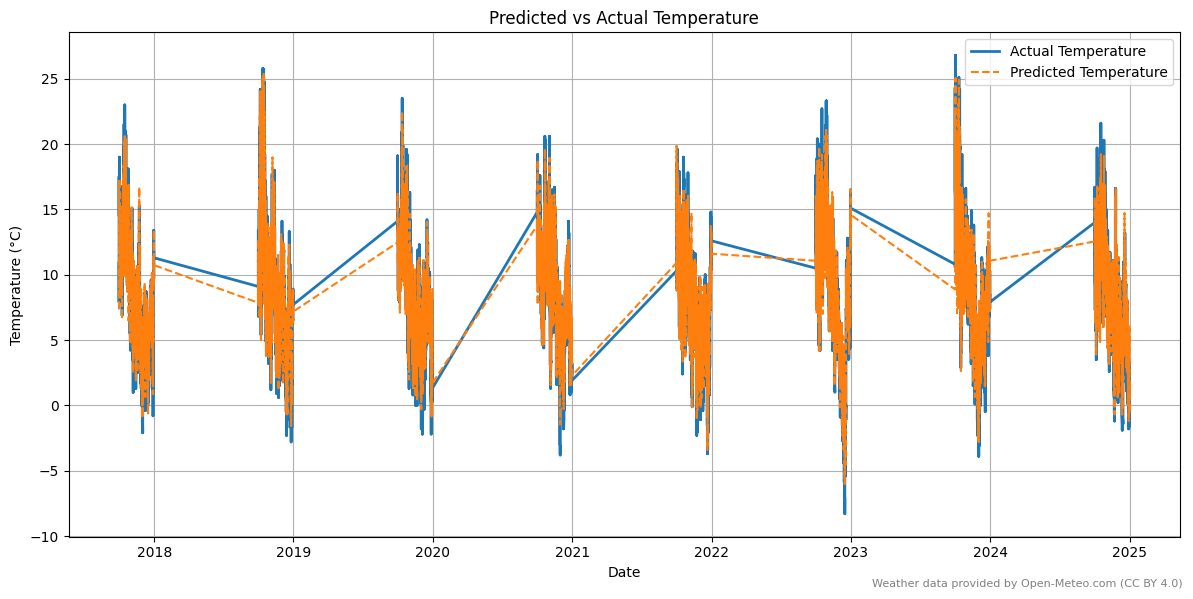

Current weather input:


,value
date,2025-11-06
temp,11.8
rel_humidity,63
pressure,1003.7
wind_speed,15.1
wind_direction,116
precip,0.0


Predicted temperature: 6.63 °C


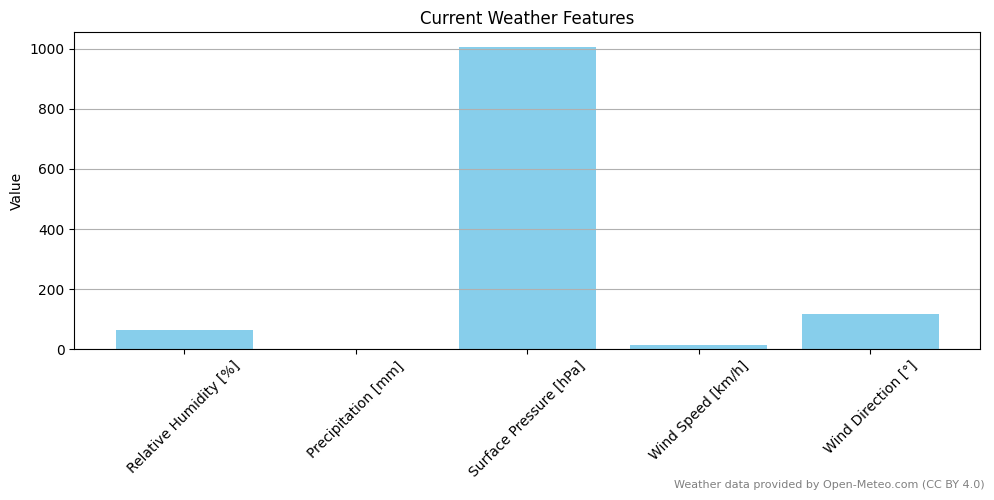

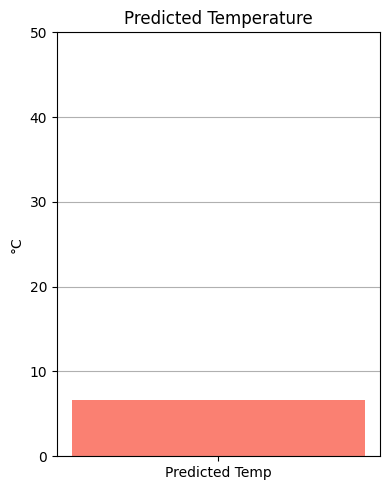

INFO:prefect.task_runs:Finished in state Completed()


Table elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_november_2025.elt_weather_prediction_table_20251106_1030 exists but is empty. Loading data...


INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.flow_runs:Finished in state Completed()


Loaded 1 rows to elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_november_2025.elt_weather_prediction_table_20251106_1030


In [7]:
import sys
import importlib
import os

# Define the parent directory that contains both weather_pipeline and gcp_utils
parent_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast"

# Add the parent directory to sys.path to allow importing modules from its subdirectories
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to sys.path: {sys.path}")

import main
import gcp_utils.manage_gcp as manage_gcp

# Reload the modules to pick up any recent changes
importlib.reload(main)
importlib.reload(manage_gcp)
print(main.__file__)

# Call the Prefect flow pipeline
main.weather_pipeline_flow("/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml")

# Future Dockerization of the Project

For future dockerization base Dockerfile (commented out):

In [8]:
# dockerfile_code = """
# FROM python:3.10-slim

# WORKDIR /app

# COPY . .

# RUN pip install --no-cache-dir -r requirements.txt

# CMD ["python", "main.py"]
# """

# with open(f"{project_dir}/Dockerfile", "w") as f:
#     f.write(dockerfile_code)
